### Support Vector Machine

In [1]:
import numpy as np
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.svm import SVC 
from sklearn.datasets import make_blobs
from scipy import stats

In [2]:
# Generate a synthetic dataset with two clusters
X, y = make_blobs(n_samples = 50, centers = 2, random_state = 0, cluster_std = 0.60)

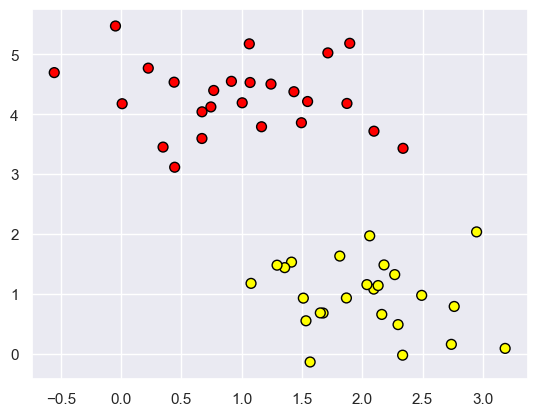

In [3]:
# Plot a scatter plot
plt.scatter(X[:, 0], X[:, 1], c = y, s = 50, cmap = 'autumn', edgecolor = 'black')

In [4]:
# Create an array of x-values from -1 to 3.5 for plotting lines
xfit = np.linspace(-1, 3.5)

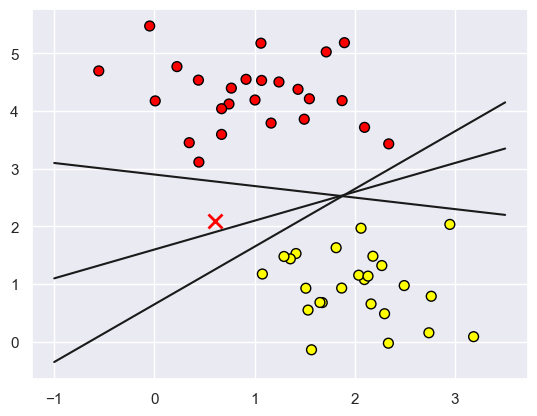

In [5]:
# Plot a scatter plot
plt.scatter(X[:, 0], X[:, 1], c = y, s = 50, cmap = 'autumn', edgecolor = 'black')

# Plot a red 'x' marker
plt.plot([0.6], [2.1], 'x', color = 'red', markeredgewidth = 2, markersize = 10)

# Loop over each slope and intercept pair to plot multiple lines
for m, b in [(1, 0.65), (0.5, 1.6), (-0.2, 2.9)]:
    plt.plot(xfit, m * xfit + b, '-k')

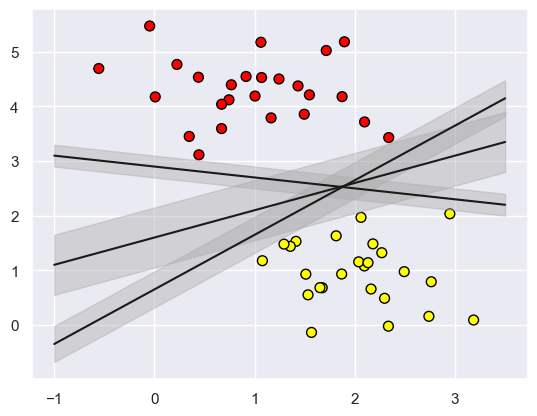

In [6]:
# Plot a scatter plot
plt.scatter(X[:, 0], X[:, 1], c = y, s = 50, cmap = 'autumn', edgecolor = 'black')

# Loop over each slope, intercept, and margin width to plot multiple lines
for m, b, d in [(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]:
    yfit = m * xfit + b
    plt.plot(xfit, yfit, '-k')
    plt.fill_between(xfit, yfit - d, yfit + d, edgecolor = 'none', color = '#AAAAAA', alpha = 0.4)

In [7]:
svc_model = SVC(kernel = 'linear', C = 1) # Initialize the SVM model
svc_model.fit(X, y) # Fit the model

SVC(C=1, kernel='linear')

In [8]:
def plot_svc_decision_function(model, ax = None, plot_support = True):

    # If no Axes object is passed, use the current Axes
    if ax is None:
        ax = plt.gca()

    # Get current axis limits to preserve them after plotting
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # Create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # Plot decision boundary and margins
    ax.contour(X, Y, P, colors = 'k', levels = [-1, 0, 1], alpha = 0.5, linestyles = ['--', '-', '--'])
    
    # Optionally plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s = 300, linewidth = 1, facecolors = 'none', edgecolor = "black")
    
    # Restore original axis limits
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

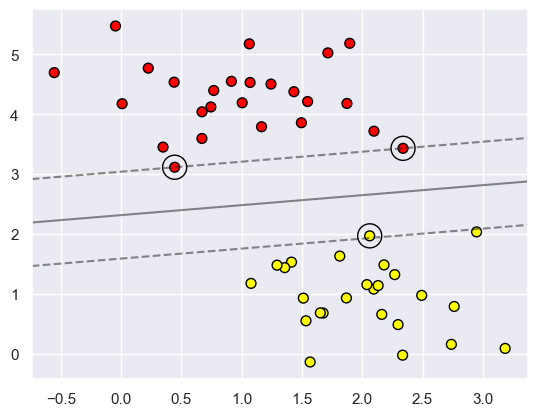

In [9]:
# Plot a scatter plot
plt.scatter(X[:, 0], X[:, 1], c = y, s = 50, cmap = 'autumn', edgecolor = 'black')

# Plot the decision boundary and margins
plot_svc_decision_function(svc_model)

In [10]:
# Print the coordinates of the support vectors
print(svc_model.support_vectors_)

[[0.44359863 3.11530945]
 [2.33812285 3.43116792]
 [2.06156753 1.96918596]]


---

### Support Vector Machine - Kernel

In [11]:
from sklearn.datasets import make_circles

In [12]:
# Generate a toy dataset of points forming two concentric circles
X, y = make_circles(100, factor = 0.1, noise = 0.1)

In [13]:
# Fit an SVM model with a linear kernel
svc_model = SVC(kernel = 'linear').fit(X, y)

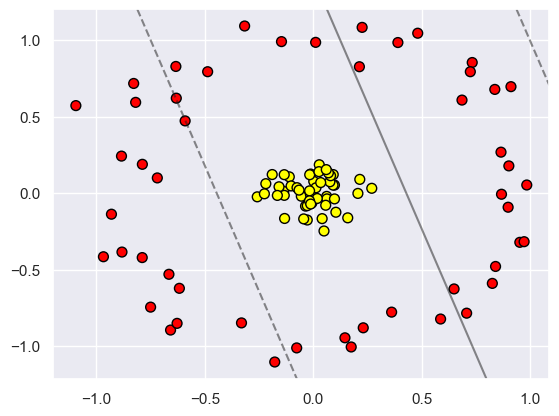

In [14]:
# Plot a scatter plot
plt.scatter(X[:, 0], X[:, 1], c = y, s = 50, cmap = 'autumn', edgecolor = 'black')

# Plot the decision boundary and margins
plot_svc_decision_function(svc_model, plot_support = False)

In [15]:
svc_kernel_model = SVC(kernel = 'poly', degree = 2, C = 1E6) # Initialize the SVM model with a polynomial kernel
svc_kernel_model.fit(X, y) # Fit the model

SVC(C=1000000.0, degree=2, kernel='poly')

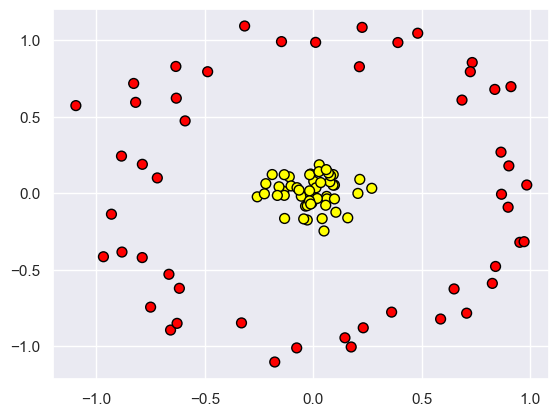

In [16]:
# Plot a scatter plot
plt.scatter(X[:, 0], X[:, 1], c = y, s = 50, cmap = 'autumn', edgecolor = 'black')


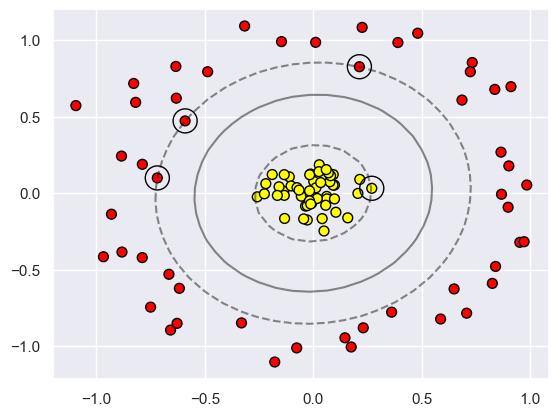

In [17]:
# Plot a scatter plot
plt.scatter(X[:, 0], X[:, 1], c = y, s = 50, cmap = 'autumn', edgecolor = 'black')

# Plot the decision boundary and margins
plot_svc_decision_function(svc_kernel_model)

# Highlight the support vectors
plt.scatter(svc_kernel_model.support_vectors_[:, 0], svc_kernel_model.support_vectors_[:, 1], s = 300, lw = 1, facecolors = 'none')

---

### Soft Margin Classification with Support Vector Machine

In [18]:
# Generate a synthetic dataset with two clusters
X, y = make_blobs(n_samples = 100, centers = 2, random_state = 0, cluster_std = 1.2)

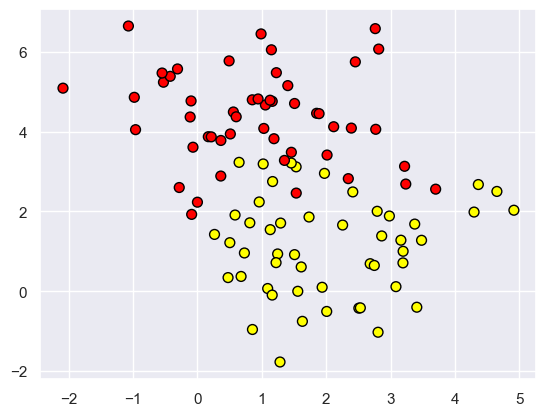

In [19]:
# Plot a scatter plot
plt.scatter(X[:, 0], X[:, 1], c = y, s = 50, cmap = 'autumn', edgecolor = 'black')

In [20]:
# Generate a synthetic dataset with two clusters
X, y = make_blobs(n_samples = 100, centers = 2, random_state = 0, cluster_std = 0.8)

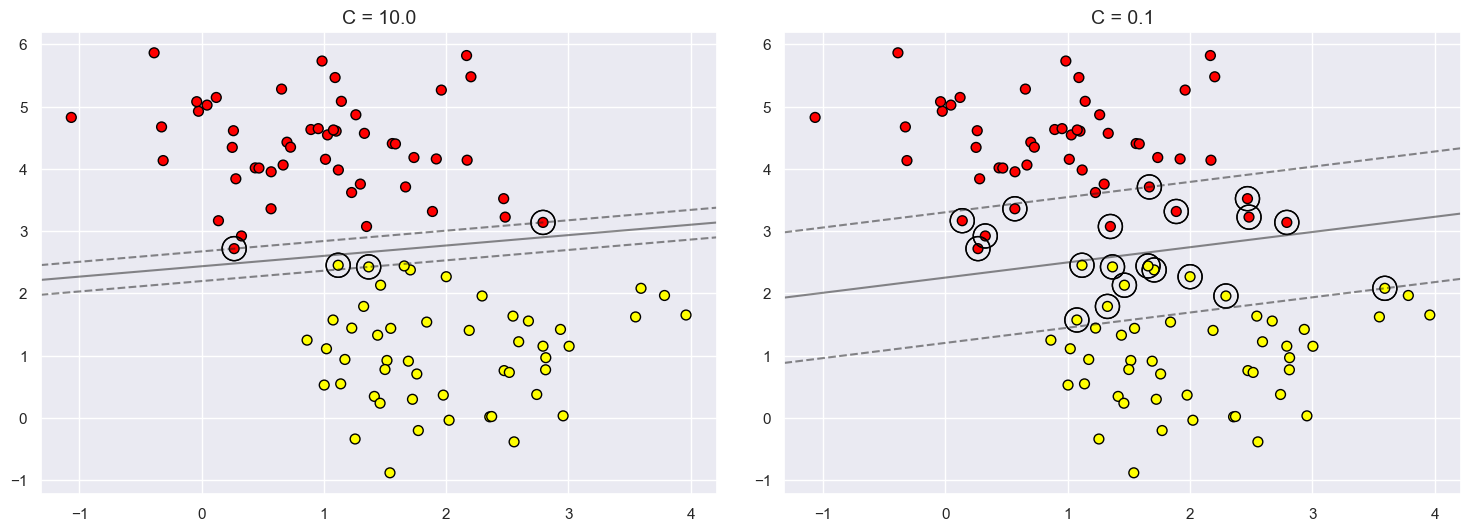

In [21]:
# Create a figure with two subplots
fig, ax = plt.subplots(1, 2, figsize = (16, 6))
fig.subplots_adjust(left = 0.0625, right = 0.95, wspace = 0.1)

# Loop through the subplots and SVM models with different regularization parameter
for axi, C in zip(ax, [10.0, 0.1]):
    svc_model = SVC(kernel = 'linear', C = C).fit(X, y)
    axi.scatter(X[:, 0], X[:, 1], c = y, s = 50, cmap = 'autumn', edgecolor = 'black')
    plot_svc_decision_function(svc_model, axi)
    axi.scatter(svc_model.support_vectors_[:, 0], svc_model.support_vectors_[:, 1], s = 300, lw = 1, facecolors = 'none', edgecolor = 'black')
    axi.set_title('C = {0:.1f}'.format(C), size = 14)

---

### Support Vector Machine Example - Face Recognition

In [22]:
from sklearn.datasets import fetch_lfw_people
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix

In [23]:
faces = fetch_lfw_people(min_faces_per_person = 60)
print(faces.target_names)
print(faces.images.shape)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
(1348, 62, 47)


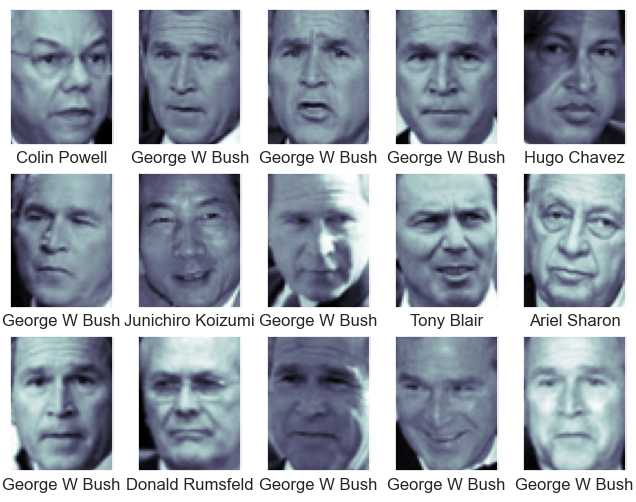

In [24]:
# Create a 3x5 grid of subplots
fig, ax = plt.subplots(3, 5, figsize = (8, 6))

# Loop over each subplot and display an image with a label
for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[i], cmap = 'bone') # Display the image in grayscale
    axi.set(xticks = [], yticks = []) # Remove x and y axis ticks
    axi.set(xlabel = faces.target_names[faces.target[i]]) # Set the x-axis label to the target name associated with the current image

In [25]:
pca = PCA(n_components = 150, whiten = True, random_state = 42) # Initialize PCA
svc = SVC(kernel = 'rbf', class_weight = 'balanced') # Set up an SVM classifier
model = make_pipeline(pca, svc) # Combine PCA and SVC into a pipeline

In [26]:
# Split the dataset into training and testing sets
Xtrain, Xtest, ytrain, ytest = train_test_split(faces.data, faces.target, random_state = 42)

In [27]:
# Define a grid of parameters
param_grid = {'svc__C': [1, 10],
              'svc__gamma': [0.0001, 0.001, 0.01]}

# Set up grid search with cross-validation
grid = GridSearchCV(model, param_grid, cv = 5,n_jobs = -1)

# Fit the model with grid search
grid.fit(Xtrain, ytrain)

print(grid.best_params_)

{'svc__C': 1, 'svc__gamma': 0.001}


In [28]:
# Retrieve the best estimator from the grid search results
model = grid.best_estimator_

# Use the best model to predict labels
yfit = model.predict(Xtest)

Text(0.5, 0.98, 'Predicted Names; Incorrect Labels in Red')

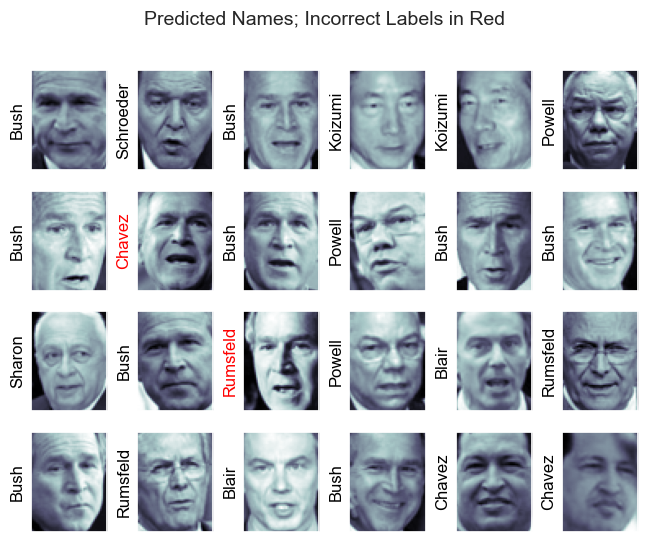

In [29]:
# Create a 4x6 grid of subplots
fig, ax = plt.subplots(4, 6, figsize = (8, 6))

# Loop through each subplot and populate it with an image and label
for i, axi in enumerate(ax.flat):
    axi.imshow(Xtest[i].reshape(62, 47), cmap = 'bone') # Display the image in grayscale
    axi.set(xticks = [], yticks = []) # Remove x and y axis ticks
    axi.set_ylabel(faces.target_names[yfit[i]].split()[-1], color = 'black' if yfit[i] == ytest[i] else 'red') # Set label to the predicted last name
fig.suptitle('Predicted Names; Incorrect Labels in Red', size = 14)

In [30]:
# Print a report on the model's classification performance
print(classification_report(ytest, yfit, target_names = faces.target_names))

                   precision    recall  f1-score   support

     Ariel Sharon       0.62      0.87      0.72        15
     Colin Powell       0.87      0.85      0.86        68
  Donald Rumsfeld       0.83      0.81      0.82        31
    George W Bush       0.94      0.81      0.87       126
Gerhard Schroeder       0.70      0.83      0.76        23
      Hugo Chavez       0.80      0.80      0.80        20
Junichiro Koizumi       0.92      1.00      0.96        12
       Tony Blair       0.78      0.95      0.86        42

         accuracy                           0.85       337
        macro avg       0.81      0.86      0.83       337
     weighted avg       0.86      0.85      0.85       337



Text(54.74999999999999, 0.5, 'predicted label')

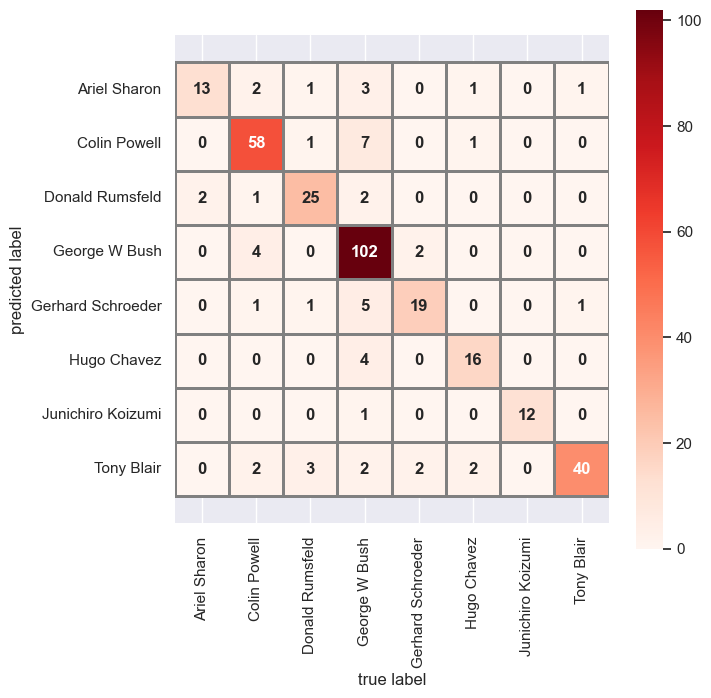

In [31]:
# Create the confusion matrix
mat = confusion_matrix(ytest, yfit)

# Create a figure and axis for the heatmap
fig, ax = plt.subplots(figsize = (7, 7))

# Plot the heatmap
ax = sns.heatmap(mat.T,
                 square = True, 
                 linecolor = 'grey', 
                 linewidths = 1, 
                 annot = True,
                 fmt = 'd', 
                 cbar = True, 
                 cmap = 'Reds', 
                 ax = ax, 
                 annot_kws = {"fontsize": 12, "weight": "bold"},
                 xticklabels = faces.target_names,
                 yticklabels = faces.target_names)

# Adjust the y-axis
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

# Set the labels for the axes
plt.xlabel('true label')
plt.ylabel('predicted label')